# Putting it all together - Basic Text Processing and Analysis

In [1]:
from nltk.corpus import gutenberg
import matplotlib.pyplot as plt

%matplotlib inline

bible = gutenberg.open('bible-kjv.txt')
bible = bible.readlines()

bible[:5]

['[The King James Bible]\n',
 '\n',
 'The Old Testament of the King James Bible\n',
 '\n',
 'The First Book of Moses:  Called Genesis\n']

In [2]:
len(bible)

99805

In [3]:
bible = list(filter(None, [item.strip('\n') for item in bible]))
bible[:5]

['[The King James Bible]',
 'The Old Testament of the King James Bible',
 'The First Book of Moses:  Called Genesis',
 '1:1 In the beginning God created the heaven and the earth.',
 '1:2 And the earth was without form, and void; and darkness was upon']

In [4]:
len(bible)

74645

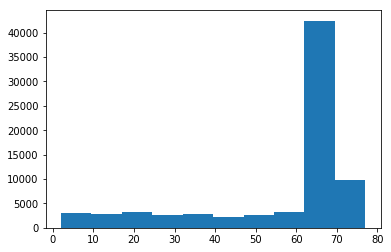

In [5]:
line_lengths = [len(sentence) for sentence in bible]
h = plt.hist(line_lengths)

In [6]:
tokens = [item.split() for item in bible]
print(tokens[:5])

[['[The', 'King', 'James', 'Bible]'], ['The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible'], ['The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis'], ['1:1', 'In', 'the', 'beginning', 'God', 'created', 'the', 'heaven', 'and', 'the', 'earth.'], ['1:2', 'And', 'the', 'earth', 'was', 'without', 'form,', 'and', 'void;', 'and', 'darkness', 'was', 'upon']]


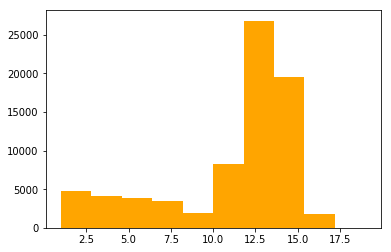

In [10]:
total_tokens_per_line = [len(sentence.split()) for sentence in bible]
h = plt.hist(total_tokens_per_line, color='orange')

In [163]:
words = [word for sentence in tokens for word in sentence]
print(words[:20])

['[The', 'King', 'James', 'Bible]', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses:', 'Called', 'Genesis', '1:1']


In [164]:
words = list(filter(None, [re.sub(r'[^A-Za-z]', '', word) for word in words]))
print(words[:20])

['The', 'King', 'James', 'Bible', 'The', 'Old', 'Testament', 'of', 'the', 'King', 'James', 'Bible', 'The', 'First', 'Book', 'of', 'Moses', 'Called', 'Genesis', 'In']


In [165]:
from collections import Counter

words = [word.lower() for word in words]
c = Counter(words)
c.most_common(10)

[('the', 64023),
 ('and', 51696),
 ('of', 34670),
 ('to', 13580),
 ('that', 12912),
 ('in', 12667),
 ('he', 10419),
 ('shall', 9838),
 ('unto', 8997),
 ('for', 8970)]

In [166]:
import nltk 

stopwords = nltk.corpus.stopwords.words('english')
words = [word.lower() for word in words if word not in stopwords]
c = Counter(words)
c.most_common(10)

[('shall', 9838),
 ('unto', 8997),
 ('lord', 7830),
 ('thou', 5474),
 ('thy', 4600),
 ('god', 4442),
 ('said', 3999),
 ('ye', 3983),
 ('thee', 3826),
 ('upon', 2748)]